In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv im

In [2]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
true_regression_line = true_intercept + true_slope * x
y = true_regression_line + np.random.normal(scale=0.5, size=size)
data = dict(x=x, y=y)

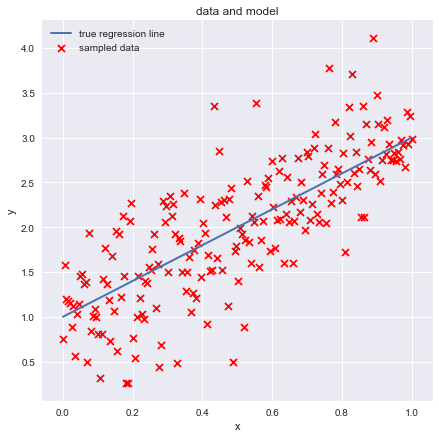

In [3]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='data and model')
ax.scatter(x, y, marker='x', color='r', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc='best')

In [4]:
with pm.Model() as model:
    # priors
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('Intercept', mu=0, sd=20)
    x_coeff = pm.Normal('x', mu=0, sd=20)
    
    # likelihood
    likelihood = pm.Normal('y', mu = intercept + x_coeff*x, sd=sigma, observed=y)
    
    # inference
    trace = pm.sample(500, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\ProgramData\Anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept, sigma_log__]


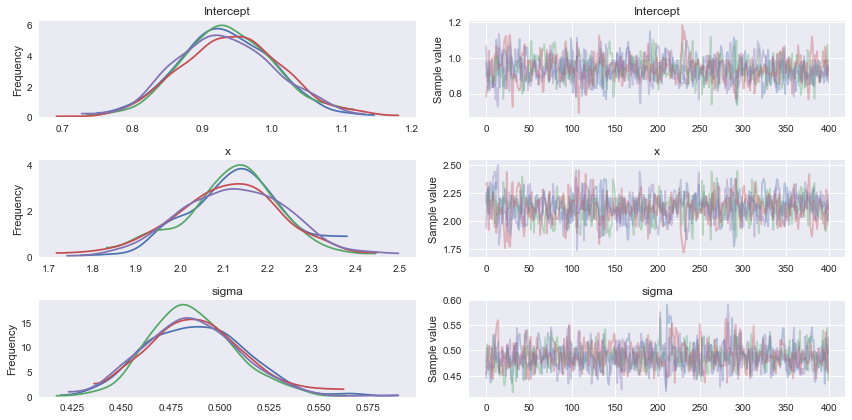

In [6]:
plt.figure(figsize=(7,7))
pm.traceplot(trace[100:])
plt.tight_layout()

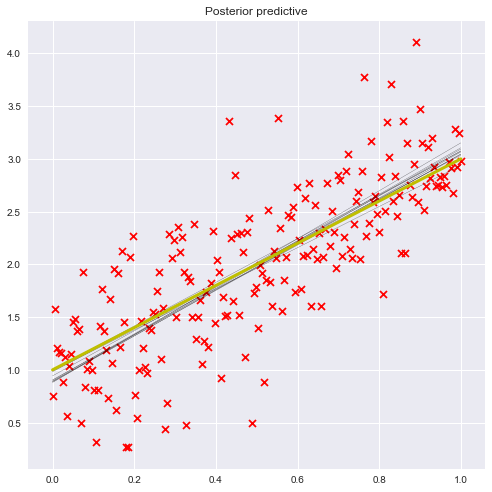

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(x, y, marker='x', color='r')
pm.plot_posterior_predictive_glm(trace, samples=10)
plt.plot(x, true_regression_line, lw=3., c='y')
plt.tight_layout()

In [23]:
trace['x'].mean(), trace['Intercept'].mean(), trace['sigma'].mean()

(2.1229177580123633, 0.9339231692229922, 0.4870652051433333)